# Using CNN to classifiy malicious PE files into malware family

Please take a careful look at the following tutorial.

https://www.tensorflow.org/tutorials/keras/classification

It is an example of using tensorflow/keras to build a simple neural network to classify images of clothing. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

Please write your homework by modifying this tutorial. We will provide you the first 748 bytes of several PE files and their corresponding class labels (just like the example in the tutorial). Please desgin a more complicated neural network (e.g., using convolution, pooling, dense, dropout, dense, softmax, ...) to increase the classification accuracy.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


### Get pefiles



In [ ]:
!wget https://drive.google.com/uc?id=1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw -O pefiles.pickle

--2022-05-08 05:17:10--  https://drive.google.com/uc?id=1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw
Resolving drive.google.com (drive.google.com)... 142.251.8.113, 142.251.8.139, 142.251.8.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0vj5d6b5co4qgjhra4inulb4b2r73t0o/1651986975000/17174434063503717705/*/1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw [following]
--2022-05-08 05:17:14--  https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0vj5d6b5co4qgjhra4inulb4b2r73t0o/1651986975000/17174434063503717705/*/1Vm3K0F8LdtvEh-8GoDtJELu5Qo179aVw
Resolving doc-0c-38-docs.googleusercontent.com (doc-0c-38-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0c-38-docs.googleusercontent.com (doc-0c-38-docs.googleusercontent.com)|64.233.189.132|:44

In [ ]:
!ls -al

total 292
drwxr-xr-x 1 root root   4096 May  8 05:17 .
drwxr-xr-x 1 root root   4096 May  8 05:15 ..
drwxr-xr-x 4 root root   4096 May  3 13:41 .config
-rw-r--r-- 1 root root 282207 May  8 05:17 pefiles.pickle
drwxr-xr-x 1 root root   4096 May  3 13:42 sample_data


### load training data

In [ ]:
import pickle

def my_load_data(p):
  with open(p, 'rb') as fd:
    tu = pickle.load(fd)
  return (tu[0], tu[1])

In [ ]:
(train_images, train_labels) = my_load_data("/content/pefiles.pickle")

In [ ]:
# now go https://www.tensorflow.org/tutorials/keras/classification
# and try to understand the tutorial
# and write your code below.
# My codes is very similar to the tutorial.

In [ ]:
# our data includes 11 different malware families
class_names = ['Urausy.C', 'Elkern.B', 'Fareit', 'Hotbar', 'Gepys.A', 'Bulta!rfn', 'Zbot',
               'GameVance', 'Zegost.B', 'Bifrose.AE', 'Zbot!GO']
len_classes = len(class_names)

print(len_classes)

11


### Explore the data

In [ ]:
# We have 356 malware pefiles, and each of them represented as a 28x28 byte array.
train_images.shape

(356, 28, 28)

In [ ]:
# The lenght of the label is 356 as well.
len(train_labels)

356

In [ ]:
# Each label is an integer.
# The 1st malware's label is 5.
# It stands for that the 1st malware belongs to 'Bulta!rfn' family.
# See class_names. Its index starts from 0. 
train_labels

array([ 5,  4,  2,  6,  3,  7,  2,  3,  0,  2,  2,  3,  7,  3,  3,  3,  2,
        2,  7,  9,  5,  1,  4, 10,  2,  4,  0,  6,  2,  6,  2,  3,  4,  2,
        2,  2,  6, 10,  2,  3,  2,  0,  2,  3,  4,  0, 10,  3,  2,  4,  2,
        2,  2,  9,  2,  5,  0,  5,  4,  3,  0,  2,  3,  3,  2,  3,  1,  2,
        0,  4,  3,  4,  3,  2,  3,  1,  4,  2,  0,  1,  6,  4,  3,  4,  2,
        3,  2,  5,  7,  2,  3,  3,  8,  5,  6,  4,  4,  0,  3,  6,  0,  3,
        7,  4,  9,  6,  2,  3,  4,  4,  1,  2, 10,  4, 10,  4,  3,  6,  8,
        4,  0,  0,  0,  9,  3,  4,  1,  2,  0,  2, 10,  3,  2,  3,  2,  2,
        4,  3,  3,  4,  2,  3,  2,  0,  8,  6,  2,  2, 10,  3,  0,  4,  5,
        5,  0,  3,  9,  9,  2,  0,  1,  5,  0,  6,  6,  6,  3,  9,  6, 10,
        3,  6,  8,  2,  4,  0,  3,  3,  6,  5,  4,  4,  4,  2,  3,  1,  1,
       10,  3,  3,  5,  3,  2,  6,  3,  8,  2,  2,  0,  0,  7,  2,  3,  3,
        1,  9,  4,  0,  3,  3,  0,  7,  4,  2,  5,  5, 10,  8,  6,  4,  0,
        3,  4,  4,  2,  0

In [ ]:
# An example of first (indexed by 0) PE files.
# It is a 28x28 integer matrix.
train_images[0]

array([[ 77,  90,  80,   0,   2,   0,   0,   0,   0,   0,  15,   0, 255,
        255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,   0,
         26,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 124,   0,   0,   0, 186,  16,   0,  14,  31,
        180,   9, 205,  33, 184,   1,  76, 205,  33, 144, 144,  84, 104,
        105, 115],
       [ 32, 112, 114, 111, 103, 114,  97, 109,  32, 109, 117, 115, 116,
         32,  98, 101,  32, 114, 117, 110,  32, 117, 110, 100, 101, 114,
         32,  87],
       [105, 110,  51,  50,  13,  10,  36,  55,   0,   0,   0,   0,  80,
         69,   0,   0,  76,   1,   4,   0, 254, 114,  22,  79,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 224,   0,  15,   1,  11,   1,  10,   0,   0,
         22,   0,   0,   0, 184,   5,   0,   0,   0,   0,   0, 180,  20,
          0,   0],
       [  

### Preprocess the data

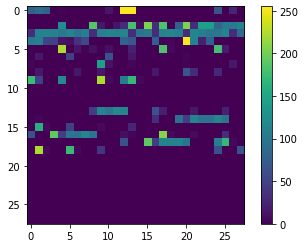

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Note that we can view the first 28x28 bytes of a PE file as an image.
# A byte with value 0 (or '0x00') has darkest color,
# whilw a byte with value 255 (or '0xFF') has brightest color.
# Below is the visualization of the first PE file.

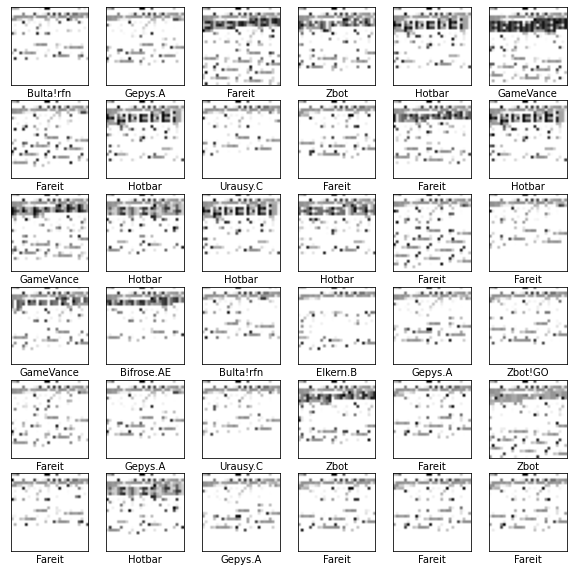

In [ ]:
# Here are the examples of 36 PE files,
# presented as 28x28 images.
# However, I use 'plt.cm.binary' to show only grey-scale color.
# You may try the following page to change to other colors.
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The above images are samples of different PE files. Could you visually distinguish them? Their labels are shown under each of the image.

Q1: Before building the model, if there is anything you can do to the data, do it right here.


In [ ]:
# Any preprocessing?
train_images=train_images/255

### Build the model

In [ ]:
# This is the model from tensorflow's example.
# Please try to modify it.

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len_classes)
])

In [ ]:
# This is the model from tensorflow's example.
# Please try to modify it.

model1.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Q2: Why the example use 'SparseCategoricalCrossentropy' and what is 'from_logits'? Is "SGD" good enough? (what if not?)

A2:

SparseCategoricalCrossEntropy:Turn numerical encoding into one hot encoding.  In this example, the label is numerical(0~10).

from_logits:whether the predictions are expected to be logits tensor. 

SGD is not good enough comparing to adam optimizer(codes below)

### Train the model

In [ ]:
# This is the model from tensorflow's example.
# Please try to modify it.

model1.fit(train_images, train_labels, epochs=60)

Epoch 1/60
12/12 [==============================] - 1s 4ms/step - loss: 2.2638 - accuracy: 0.2697
Epoch 2/60
12/12 [==============================] - 0s 3ms/step - loss: 2.0872 - accuracy: 0.4017
Epoch 3/60
12/12 [==============================] - 0s 3ms/step - loss: 1.9539 - accuracy: 0.4017
Epoch 4/60
12/12 [==============================] - 0s 3ms/step - loss: 1.8518 - accuracy: 0.3989
Epoch 5/60
12/12 [==============================] - 0s 3ms/step - loss: 1.7785 - accuracy: 0.4045
Epoch 6/60
12/12 [==============================] - 0s 3ms/step - loss: 1.7124 - accuracy: 0.4298
Epoch 7/60
12/12 [==============================] - 0s 3ms/step - loss: 1.6533 - accuracy: 0.4326
Epoch 8/60
12/12 [==============================] - 0s 4ms/step - loss: 1.6009 - accuracy: 0.4522
Epoch 9/60
12/12 [==============================] - 0s 3ms/step - loss: 1.5516 - accuracy: 0.4494
Epoch 10/60
12/12 [==============================] - 0s 3ms/step - loss: 1.5062 - accuracy: 0.4607
Epoch 11/60
12/12 [

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len_classes)
])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.fit(train_images, train_labels, epochs=60)

Epoch 1/60
12/12 [==============================] - 0s 6ms/step - loss: 1.9499 - accuracy: 0.2949
Epoch 2/60
12/12 [==============================] - 0s 3ms/step - loss: 1.2792 - accuracy: 0.5843
Epoch 3/60
12/12 [==============================] - 0s 4ms/step - loss: 0.9629 - accuracy: 0.7669
Epoch 4/60
12/12 [==============================] - 0s 4ms/step - loss: 0.7770 - accuracy: 0.8146
Epoch 5/60
12/12 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.8792
Epoch 6/60
12/12 [==============================] - 0s 4ms/step - loss: 0.5412 - accuracy: 0.8904
Epoch 7/60
12/12 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.8792
Epoch 8/60
12/12 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8820
Epoch 9/60
12/12 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.9101
Epoch 10/60
12/12 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.9101
Epoch 11/60
12/12 [

Q3: What is 'epochs'? How does it affect the result?

A3:When finish all the training data.  If epoch is too small, it will let the accuracy too low.  But too much epoch may lead to overfitting.

Q4: What is 'split_validation' in model.fit()? Check it out in tensorflow's web page. Use it in your code.

A4:Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.

In [ ]:
#code of Q4
model1.fit(train_images, train_labels, epochs=60,validation_split=0.2)

Epoch 1/60
9/9 [==============================] - 0s 32ms/step - loss: 0.6400 - accuracy: 0.8592 - val_loss: 0.6884 - val_accuracy: 0.8194
Epoch 2/60
9/9 [==============================] - 0s 6ms/step - loss: 0.6331 - accuracy: 0.8592 - val_loss: 0.6881 - val_accuracy: 0.8194
Epoch 3/60
9/9 [==============================] - 0s 6ms/step - loss: 0.6276 - accuracy: 0.8592 - val_loss: 0.6856 - val_accuracy: 0.8333
Epoch 4/60
9/9 [==============================] - 0s 6ms/step - loss: 0.6214 - accuracy: 0.8592 - val_loss: 0.6844 - val_accuracy: 0.8333
Epoch 5/60
9/9 [==============================] - 0s 7ms/step - loss: 0.6161 - accuracy: 0.8592 - val_loss: 0.6840 - val_accuracy: 0.8194
Epoch 6/60
9/9 [==============================] - 0s 7ms/step - loss: 0.6111 - accuracy: 0.8592 - val_loss: 0.6813 - val_accuracy: 0.8333
Epoch 7/60
9/9 [==============================] - 0s 6ms/step - loss: 0.6069 - accuracy: 0.8592 - val_loss: 0.6798 - val_accuracy: 0.8333
Epoch 8/60
9/9 [=================

In [ ]:
model2.fit(train_images, train_labels, epochs=60,validation_split=0.2)

Epoch 1/60
9/9 [==============================] - 0s 24ms/step - loss: 0.0268 - accuracy: 0.9965 - val_loss: 0.0817 - val_accuracy: 0.9722
Epoch 2/60
9/9 [==============================] - 0s 6ms/step - loss: 0.0295 - accuracy: 0.9965 - val_loss: 0.0735 - val_accuracy: 0.9583
Epoch 3/60
9/9 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 0.9965 - val_loss: 0.0692 - val_accuracy: 0.9583
Epoch 4/60
9/9 [==============================] - 0s 8ms/step - loss: 0.0254 - accuracy: 0.9965 - val_loss: 0.0721 - val_accuracy: 0.9583
Epoch 5/60
9/9 [==============================] - 0s 9ms/step - loss: 0.0246 - accuracy: 0.9965 - val_loss: 0.0719 - val_accuracy: 0.9583
Epoch 6/60
9/9 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9965 - val_loss: 0.0722 - val_accuracy: 0.9583
Epoch 7/60
9/9 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 0.9965 - val_loss: 0.0748 - val_accuracy: 0.9583
Epoch 8/60
9/9 [=================

Q5: Could you exaplin the output of model.fit()? And what is your accuracy?

A5:About 0.84 when using sgd opitimizer, and 0.98 when using adam optimizer

Q6: How do you know your model is not overfitted?

A6:Since we don't have test dataset, we just evaluate accuracy, if the accuracy is too high(approximate to 1.0), overfitting is usually happening.

Q7: Could you introduce 'early stop mechanism' in your code? Then, train the model again. "Early stop" means you can stop the epoch (without finishing all of them). You can prepare a validation data set and calculate your val_loss and val_accuracy at the end of each epoch. If you believe the val_loss will not improve for the next epoch, then you can stop the traning, to save time and to prevent overfitting. Does it works?

A7:In this examplke, it seems that early stop doesn't work. 

In [ ]:
#code of Q7
callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'acc', # default 'loss', you may try 'acc', 'val_acc', ...
    min_delta = 0.0005, # minimum change of 'monitor' to qualify as an improvementess.
    patience = 3, # epochs with no improvement after which training will be stopped.
    )

history1 = model1.fit(train_images, train_labels,
                      epochs = 60,
                      callbacks=[callback],
                      validation_split = 0.2,
                      )

Epoch 1/60
9/9 [==============================] - 0s 11ms/step - loss: 0.0780 - accuracy: 0.9859 - val_loss: 0.3654 - val_accuracy: 0.8750
Epoch 2/60
9/9 [==============================] - 0s 7ms/step - loss: 0.0776 - accuracy: 0.9859 - val_loss: 0.3657 - val_accuracy: 0.8750
Epoch 3/60
9/9 [==============================] - 0s 8ms/step - loss: 0.0776 - accuracy: 0.9859 - val_loss: 0.3659 - val_accuracy: 0.8750
Epoch 4/60
9/9 [==============================] - 0s 9ms/step - loss: 0.0774 - accuracy: 0.9859 - val_loss: 0.3660 - val_accuracy: 0.8750
Epoch 5/60
9/9 [==============================] - 0s 7ms/step - loss: 0.0772 - accuracy: 0.9859 - val_loss: 0.3659 - val_accuracy: 0.8750
Epoch 6/60
9/9 [==============================] - 0s 7ms/step - loss: 0.0770 - accuracy: 0.9859 - val_loss: 0.3662 - val_accuracy: 0.8750
Epoch 7/60
9/9 [==============================] - 0s 6ms/step - loss: 0.0769 - accuracy: 0.9859 - val_loss: 0.3663 - val_accuracy: 0.8750
Epoch 8/60
9/9 [=================

In [ ]:
print("Stop at epoch", len(history1.history['loss']))

Stop at epoch 20


In [ ]:
history2 = model1.fit(train_images, train_labels,
                      epochs = 60,
                      callbacks=[callback],
                      validation_split = 0.2,
                      )

Epoch 1/60
9/9 [==============================] - 0s 10ms/step - loss: 0.0675 - accuracy: 0.9859 - val_loss: 0.3728 - val_accuracy: 0.8750
Epoch 2/60
9/9 [==============================] - 0s 7ms/step - loss: 0.0675 - accuracy: 0.9894 - val_loss: 0.3730 - val_accuracy: 0.8750
Epoch 3/60
9/9 [==============================] - 0s 6ms/step - loss: 0.0673 - accuracy: 0.9894 - val_loss: 0.3729 - val_accuracy: 0.8750
Epoch 4/60
9/9 [==============================] - 0s 6ms/step - loss: 0.0676 - accuracy: 0.9859 - val_loss: 0.3731 - val_accuracy: 0.8750
Epoch 5/60
9/9 [==============================] - 0s 6ms/step - loss: 0.0670 - accuracy: 0.9894 - val_loss: 0.3730 - val_accuracy: 0.8750
Epoch 6/60
9/9 [==============================] - 0s 7ms/step - loss: 0.0668 - accuracy: 0.9859 - val_loss: 0.3730 - val_accuracy: 0.8750
Epoch 7/60
9/9 [==============================] - 0s 8ms/step - loss: 0.0668 - accuracy: 0.9894 - val_loss: 0.3730 - val_accuracy: 0.8750
Epoch 8/60
9/9 [=================

In [ ]:
print("Stop at epoch", len(history2.history['loss']))

Stop at epoch 60


Q8: Any idea of improving the classification accuracy?

A8:

1.Change batch size and epoch 

2.Change optimizer

3.Increase hidden layers

4.Increase neurons 

5.Change activation function